<a href="https://colab.research.google.com/github/sr4rish/Customer-Churn-Predictor/blob/master/Bank_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import keras
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Customer Churn Modelling/Churn_Modelling.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Feature selection
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
#One_Hot_Encoding
X_dummies = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
## Concatenate the Data Frames

#X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
#X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X_dummies)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU

In [ ]:
classifier = Sequential()

#first hidden layer with input
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11, kernel_regularizer = regularizers.l2(l = 0.001)))

#second hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', kernel_regularizer = regularizers.l2(l = 0.001)))

#output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

#compling ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting classifier on dataset
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.10, shuffle=True)

Epoch 1/100
810/810 [==============================] - 1s 2ms/step - loss: 0.5963 - accuracy: 0.8194 - val_loss: 0.5405 - val_accuracy: 0.8456
Epoch 2/100
810/810 [==============================] - 1s 1ms/step - loss: 0.5006 - accuracy: 0.8509 - val_loss: 0.4988 - val_accuracy: 0.8500
Epoch 3/100
810/810 [==============================] - 1s 1ms/step - loss: 0.4616 - accuracy: 0.8573 - val_loss: 0.4757 - val_accuracy: 0.8600
Epoch 4/100
810/810 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.8570 - val_loss: 0.4556 - val_accuracy: 0.8511
Epoch 5/100
810/810 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8617 - val_loss: 0.4446 - val_accuracy: 0.8478
Epoch 6/100
810/810 [==============================] - 1s 1ms/step - loss: 0.4036 - accuracy: 0.8615 - val_loss: 0.4262 - val_accuracy: 0.8544
Epoch 7/100
810/810 [==============================] - 1s 1ms/step - loss: 0.3933 - accuracy: 0.8615 - val_loss: 0.4168 - val_accuracy: 0.8522

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy:\n',accuracy_score(y_test, y_pred))

confusion_matrix:
 [[779  26]
 [107  88]]
Accuracy:
 0.867


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


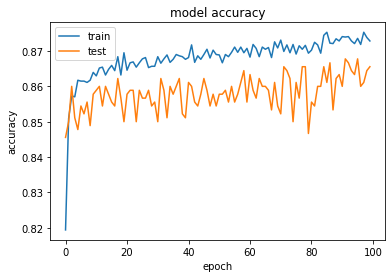

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

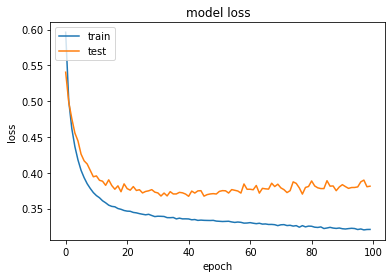

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()